# Demo

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 110
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

Sample text. $\mathcal{P}(x\,|\,\theta)$

In [2]:
import matplotlib.pyplot as plt
from muse_inference import muse, MuseProblem, MuseResult
import numpy as np

In [3]:
θ_true = 1

## With numpy

In [4]:
class NumpyFunnelMuseProblem(MuseProblem):
    
    def __init__(self, N):
        self.N = N
    
    def sample_x_z(self, rng, θ):
        z = rng.randn(self.N) * np.exp(θ/2)
        x = z + rng.randn(self.N)
        return (x, z)
    
    def gradθ_logLike(self, x, z, θ):
        return np.sum(z**2)/(2*np.exp(θ)) - self.N/2
    
    def logLike_and_gradz_logLike(self, x, z, θ):
        logLike = -(np.sum((x - z)**2) + np.sum(z**2) / np.exp(θ) + 512*θ) / 2
        gradz_logLike = x - z * (1 + np.exp(-θ))
        return (logLike, gradz_logLike)
    
    def grad_hess_θ_logPrior(self, θ):
        return (-θ/(3**2), -1/3**2)
    

In [5]:
prob = NumpyFunnelMuseProblem(512)
rng = np.random.RandomState(0)
(x, z) = prob.sample_x_z(rng, θ_true)
prob.x = x

In [6]:
result = MuseResult()
muse(result, prob, 0, α=0.7, rng=np.random.RandomState(3), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  9%|▉         | 95/1010 [00:00<00:00, 941.44it/s]

 19%|█▉        | 190/1010 [00:00<00:00, 935.44it/s]

 28%|██▊       | 285/1010 [00:00<00:00, 938.85it/s]

 38%|███▊      | 384/1010 [00:00<00:00, 956.33it/s]

 48%|████▊     | 482/1010 [00:00<00:00, 964.57it/s]

 58%|█████▊    | 587/1010 [00:00<00:00, 992.08it/s]

 69%|██████▊   | 693/1010 [00:00<00:00, 1012.44it/s]

 79%|███████▉  | 798/1010 [00:00<00:00, 1024.04it/s]

 89%|████████▉ | 901/1010 [00:00<00:00, 1025.46it/s]

100%|██████████| 1010/1010 [00:00<00:00, 1097.39it/s]

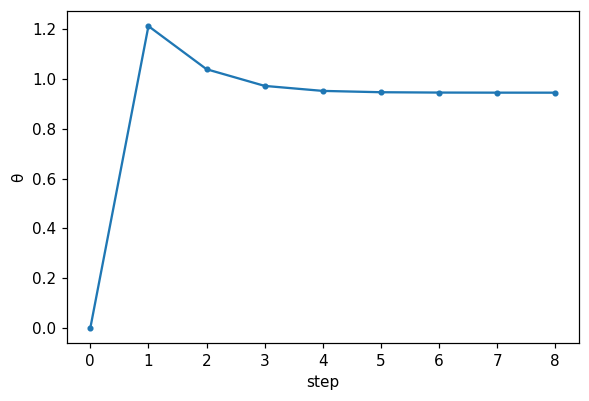

In [7]:
plt.plot([h["θ"] for h in result.history], ".-")
plt.xlabel("step")
plt.ylabel("θ");

## With Jax

In [8]:
import jax
import jax.numpy as jnp
from muse_inference.jax import JittedJaxMuseProblem

In [9]:
class JaxFunnelMuseProblem(JittedJaxMuseProblem):
    
    def __init__(self, N):
        self.N = N

    def sample_x_z(self, rng, θ):
        z = rng.randn(self.N) * np.exp(θ/2)
        x = z + rng.randn(self.N)
        return (x, z)

    def logLike(self, x, z, θ):
        return -(jnp.sum((x - z)**2) + jnp.sum(z**2) / jnp.exp(θ) + 512*θ) / 2
    
    def logPrior(self, θ):
        return -θ**2 / (2*3**2)
    

In [10]:
prob = JaxFunnelMuseProblem(512)
rng = np.random.RandomState(0)
(x, z) = prob.sample_x_z(rng, θ_true)
prob.x = x

In [11]:
result = MuseResult()
muse(result, prob, 0., α=0.7, rng=np.random.RandomState(3), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 1/1010 [00:01<28:29,  1.69s/it]

  1%|          | 9/1010 [00:01<02:28,  6.75it/s]

  2%|▏         | 19/1010 [00:01<01:02, 15.97it/s]

  3%|▎         | 30/1010 [00:02<00:35, 27.34it/s]

  4%|▍         | 41/1010 [00:02<00:24, 39.32it/s]

  5%|▌         | 51/1010 [00:02<00:19, 49.69it/s]

  6%|▌         | 62/1010 [00:02<00:15, 60.84it/s]

  7%|▋         | 73/1010 [00:02<00:13, 70.46it/s]

  8%|▊         | 83/1010 [00:02<00:12, 75.45it/s]

  9%|▉         | 94/1010 [00:02<00:11, 82.06it/s]

 10%|█         | 104/1010 [00:04<00:56, 15.90it/s]

 11%|█▏        | 114/1010 [00:04<00:42, 21.12it/s]

 12%|█▏        | 125/1010 [00:04<00:31, 28.26it/s]

 13%|█▎        | 136/1010 [00:04<00:23, 36.59it/s]

 15%|█▍        | 147/1010 [00:04<00:18, 45.79it/s]

 16%|█▌        | 158/1010 [00:05<00:15, 55.29it/s]

 17%|█▋        | 169/1010 [00:05<00:13, 64.27it/s]

 18%|█▊        | 179/1010 [00:05<00:11, 71.49it/s]

 19%|█▊        | 189/1010 [00:05<00:10, 77.69it/s]

 20%|█▉        | 200/1010 [00:05<00:09, 84.10it/s]

 21%|██        | 211/1010 [00:05<00:11, 72.63it/s]

 22%|██▏       | 221/1010 [00:05<00:10, 78.78it/s]

 23%|██▎       | 232/1010 [00:05<00:09, 85.40it/s]

 24%|██▍       | 243/1010 [00:05<00:08, 90.23it/s]

 25%|██▌       | 254/1010 [00:06<00:08, 94.33it/s]

 26%|██▌       | 265/1010 [00:06<00:07, 97.55it/s]

 27%|██▋       | 276/1010 [00:06<00:07, 99.99it/s]

 28%|██▊       | 287/1010 [00:06<00:07, 101.03it/s]

 30%|██▉       | 298/1010 [00:06<00:07, 101.16it/s]

 31%|███       | 309/1010 [00:06<00:06, 103.37it/s]

 32%|███▏      | 324/1010 [00:06<00:05, 116.29it/s]

 34%|███▎      | 339/1010 [00:06<00:05, 125.11it/s]

 35%|███▌      | 355/1010 [00:06<00:04, 132.84it/s]

 37%|███▋      | 371/1010 [00:06<00:04, 138.57it/s]

 38%|███▊      | 387/1010 [00:07<00:04, 142.93it/s]

 40%|███▉      | 403/1010 [00:07<00:04, 145.10it/s]

 41%|████▏     | 418/1010 [00:07<00:04, 137.78it/s]

 43%|████▎     | 434/1010 [00:07<00:04, 141.90it/s]

 45%|████▍     | 450/1010 [00:07<00:03, 145.14it/s]

 46%|████▌     | 465/1010 [00:07<00:03, 146.38it/s]

 48%|████▊     | 480/1010 [00:07<00:03, 138.50it/s]

 49%|████▉     | 496/1010 [00:07<00:03, 141.87it/s]

 51%|█████     | 511/1010 [00:07<00:03, 139.29it/s]

 52%|█████▏    | 527/1010 [00:08<00:03, 143.83it/s]

 54%|█████▍    | 543/1010 [00:08<00:03, 146.84it/s]

 55%|█████▌    | 558/1010 [00:08<00:03, 147.74it/s]

 57%|█████▋    | 573/1010 [00:08<00:02, 147.47it/s]

 58%|█████▊    | 588/1010 [00:08<00:02, 147.32it/s]

 60%|█████▉    | 603/1010 [00:08<00:02, 146.52it/s]

 61%|██████    | 618/1010 [00:08<00:02, 137.26it/s]

 63%|██████▎   | 633/1010 [00:08<00:02, 139.03it/s]

 64%|██████▍   | 648/1010 [00:08<00:02, 140.84it/s]

 66%|██████▌   | 664/1010 [00:09<00:02, 144.08it/s]

 67%|██████▋   | 680/1010 [00:09<00:02, 146.64it/s]

 69%|██████▉   | 696/1010 [00:09<00:02, 148.30it/s]

 70%|███████   | 711/1010 [00:09<00:02, 146.03it/s]

 72%|███████▏  | 726/1010 [00:09<00:01, 146.26it/s]

 73%|███████▎  | 741/1010 [00:09<00:01, 147.34it/s]

 75%|███████▍  | 757/1010 [00:09<00:01, 149.20it/s]

 76%|███████▋  | 772/1010 [00:09<00:01, 148.54it/s]

 78%|███████▊  | 788/1010 [00:09<00:01, 149.92it/s]

 80%|███████▉  | 803/1010 [00:09<00:01, 149.73it/s]

 81%|████████  | 818/1010 [00:10<00:01, 144.24it/s]

 83%|████████▎ | 834/1010 [00:10<00:01, 146.96it/s]

 84%|████████▍ | 850/1010 [00:10<00:01, 148.72it/s]

 86%|████████▌ | 866/1010 [00:10<00:00, 151.33it/s]

 87%|████████▋ | 882/1010 [00:10<00:00, 153.11it/s]

 89%|████████▉ | 898/1010 [00:10<00:00, 151.98it/s]

100%|██████████| 1010/1010 [00:10<00:00, 94.70it/s]

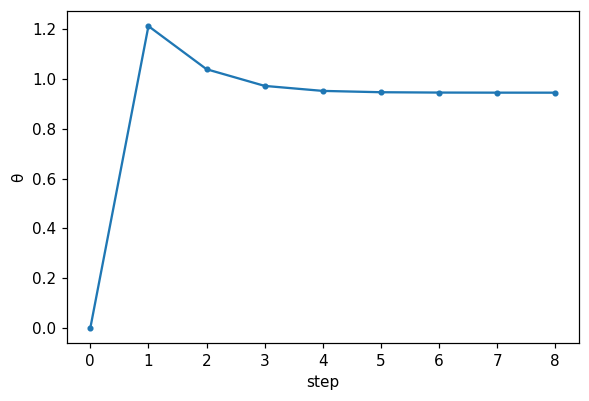

In [12]:
plt.plot([h["θ"] for h in result.history], ".-")
plt.xlabel("step")
plt.ylabel("θ");

## With PyMC

In [13]:
import pymc as pm
from muse_inference.pymc import PyMCMuseProblem

In [14]:
def gen_funnel(x=None, θ=None):
    with pm.Model() as funnel:
        θ = θ if θ else pm.Normal("θ", 0, 3)
        z = pm.Normal("z", 0, np.exp(θ / 2), size=512)
        x = pm.Normal("x", z, 1, observed=x)
    return funnel
        
x_obs = pm.sample_prior_predictive(1, model=gen_funnel(θ=θ_true)).prior.x[0,0]
funnel = gen_funnel(x_obs)
prob = PyMCMuseProblem(funnel)
prob.x = x_obs

In [15]:
result = MuseResult()
muse(result, prob, 0., α=0.7, rng=np.random.RandomState(3), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  9%|▊         | 87/1010 [00:00<00:01, 865.55it/s]

 17%|█▋        | 174/1010 [00:03<00:17, 47.57it/s]

 21%|██        | 212/1010 [00:06<00:28, 27.56it/s]

 30%|██▉       | 298/1010 [00:06<00:14, 50.08it/s]

 34%|███▍      | 345/1010 [00:09<00:21, 31.51it/s]

 40%|████      | 405/1010 [00:12<00:23, 26.30it/s]

 48%|████▊     | 489/1010 [00:12<00:12, 42.61it/s]

 53%|█████▎    | 531/1010 [00:15<00:16, 29.41it/s]

 60%|██████    | 607/1010 [00:18<00:14, 27.67it/s]

 69%|██████▉   | 697/1010 [00:18<00:07, 43.81it/s]

 73%|███████▎  | 739/1010 [00:21<00:08, 30.61it/s]

 80%|████████  | 809/1010 [00:24<00:07, 27.73it/s]

 89%|████████▉ | 899/1010 [00:24<00:02, 43.47it/s]

 93%|█████████▎| 941/1010 [00:27<00:02, 30.44it/s]

100%|██████████| 1010/1010 [00:27<00:00, 36.40it/s]

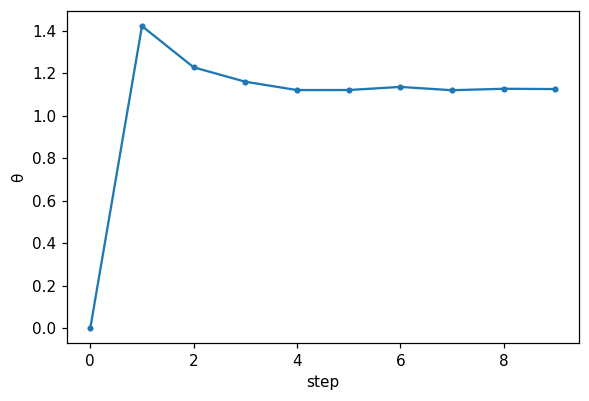

In [16]:
plt.plot([h["θ"] for h in result.history], ".-")
plt.xlabel("step")
plt.ylabel("θ");